In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandreminy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandreminy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
df = open('results_Final.txt', encoding="utf-8")

In [84]:
raw = df.read()
raw = raw.split()

In [85]:
#tokens = nltk.word_tokenize(raw)
words = [word.lower() for word in raw]

In [86]:
# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [word.translate(str.maketrans(transformation_dict)) for word in words]


In [98]:
jeanmi = []
for word in no_punctuation_reviews:
    word = word.split()
    jeanmi.append(word)

flat_list = []
for sublist in jeanmi:
    for item in sublist:
        flat_list.append(item)

In [100]:
# removing accent
with_accent = ['é', 'è', 'ê', 'à', 'ù', 'ç', 'ô', 'î']
without_accent = ['e', 'e', 'e', 'a', 'u', 'c', 'o', 'i']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [word.translate(str.maketrans(transformation_dict)) for word in flat_list]


In [101]:
stopW = stopwords.words('french')
stopW += stopwords.words('english')
stopW.append('plus','experience',)
stopword_reviews = [token for token in no_accent_reviews if token not in stopW]

filtered_words = [] 
  
for w in no_accent_reviews: 
    if w not in stopW: 
        filtered_words.append(w) 

In [102]:
long_words = []
for w in filtered_words: 
    if w == "r":
        long_words.append(w)
    elif len(w)>2:
        long_words.append(w)

In [75]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

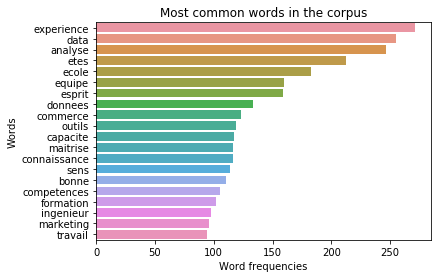

23525


In [104]:
# And making it with our current data

plot_frequent_words(long_words)
print(len(long_words))

In [105]:
count = 0
for word in long_words:
    if word == "commerce":
        count+=1
    else:
        continue
print(count)

123


In [106]:
count = 0
for word in long_words:
    if word == "ingenieur":
        count+=1
    else:
        continue
print(count)

98


# Find most frequent words by tools used

In [127]:
#Find most frequent words
dist = nltk.FreqDist(long_words)
freq=[]
for word in dist.most_common(20):
    freq.append(word[0])
print(freq)

['experience', 'data', 'analyse', 'etes', 'ecole', 'equipe', 'esprit', 'donnees', 'commerce', 'outils', 'capacite', 'maitrise', 'connaissance', 'sens', 'bonne', 'competences', 'formation', 'ingenieur', 'marketing', 'travail']


In [138]:
tools_words = [] 
uselesswords = ['stage','environnement','niveau','etre','travailler','bon',\
                'premiere','grande','diplome','gestion','poste','capacites',\
               'qualites','tres','projets','developpement','preuve',\
               'connaissances','maitrisez','comme','web','faire','savez','goût']
freq.extend(uselesswords)
for word in long_words: 
    if word not in freq: 
        tools_words.append(word)

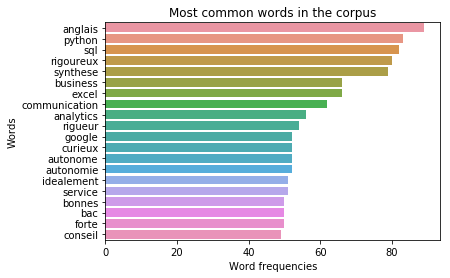

In [139]:
plot_frequent_words(tools_words)

# Word Cloud

In [134]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

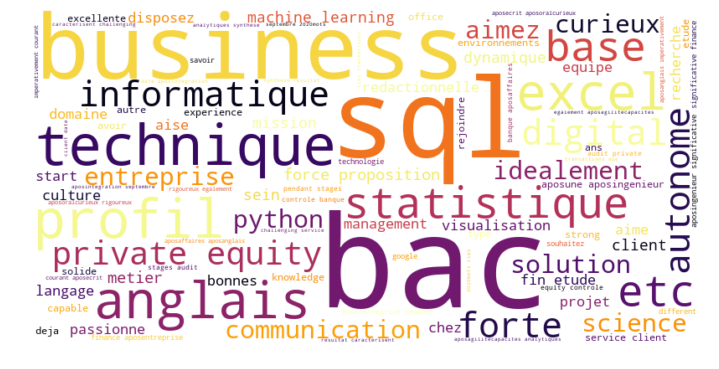

In [140]:
wordcloud = WordCloud(height=400, width=800, background_color="white", colormap='inferno', max_words=100)

wc_words = ' '
for word in tools_words:
    wc_words = wc_words + word + ' '
    
wordcloud.generate(wc_words)

plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [144]:
dist = nltk.FreqDist(tools_words)
dist.most_common(20)

[('anglais', 89),
 ('python', 83),
 ('sql', 82),
 ('rigoureux', 80),
 ('synthese', 79),
 ('business', 66),
 ('excel', 66),
 ('communication', 62),
 ('analytics', 56),
 ('rigueur', 54),
 ('google', 52),
 ('curieux', 52),
 ('autonome', 52),
 ('autonomie', 52),
 ('idealement', 51),
 ('service', 51),
 ('bonnes', 50),
 ('bac', 50),
 ('forte', 50),
 ('conseil', 49)]